In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito sin logos de IA
plt.style.use("seaborn-v0_8-whitegrid")  # Elegante y sobrio
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.2)


In [6]:
# Cargar el archivo
data = np.load("data.npz")

# Acceder a los arrays
X = data['X']

In [7]:
feature_names = [f"feat_{i}" for i in range(X.shape[1])]

df = pd.DataFrame(X, columns=feature_names)

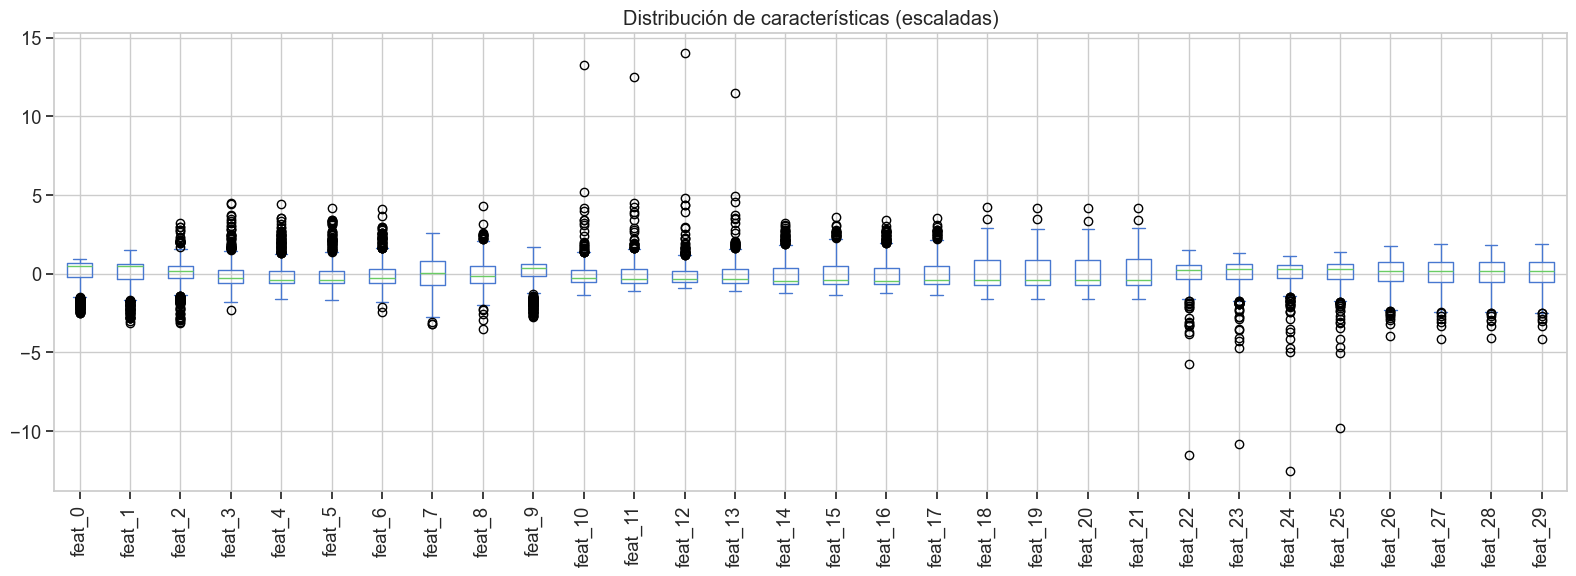

In [14]:
from sklearn.preprocessing import StandardScaler
df.describe().T  # Transpuesta para mejor visualización


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.plot.box(figsize=(16, 6))
plt.title("Distribución de características (escaladas)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


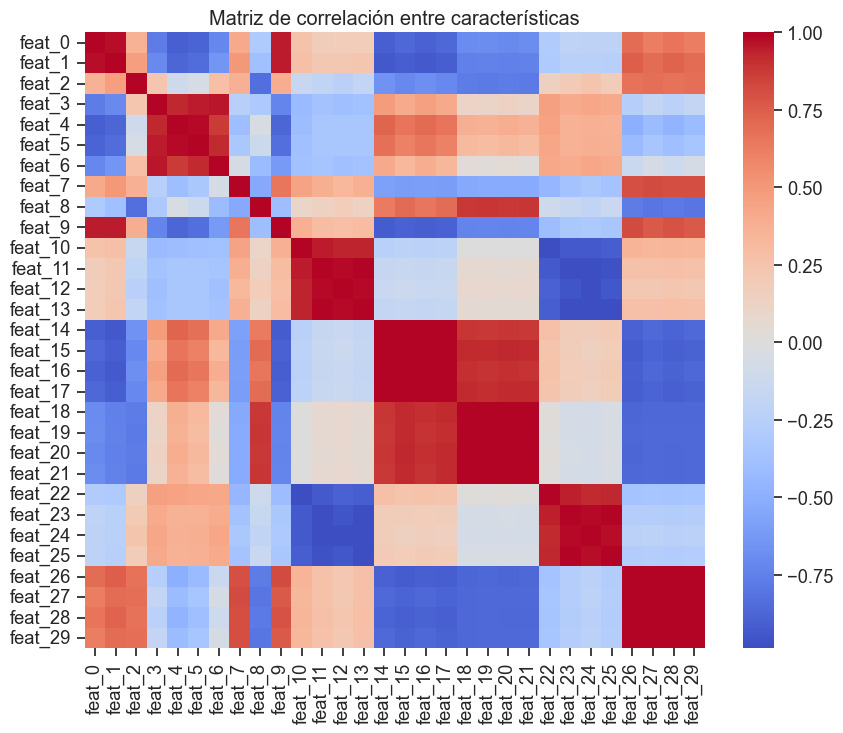

In [16]:
from sklearn.feature_selection import VarianceThreshold

# Quita las features con muy poca varianza (por ejemplo < 0.01)
selector = VarianceThreshold(threshold=0.01)
X_high_var = selector.fit_transform(df)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre características")
plt.show()

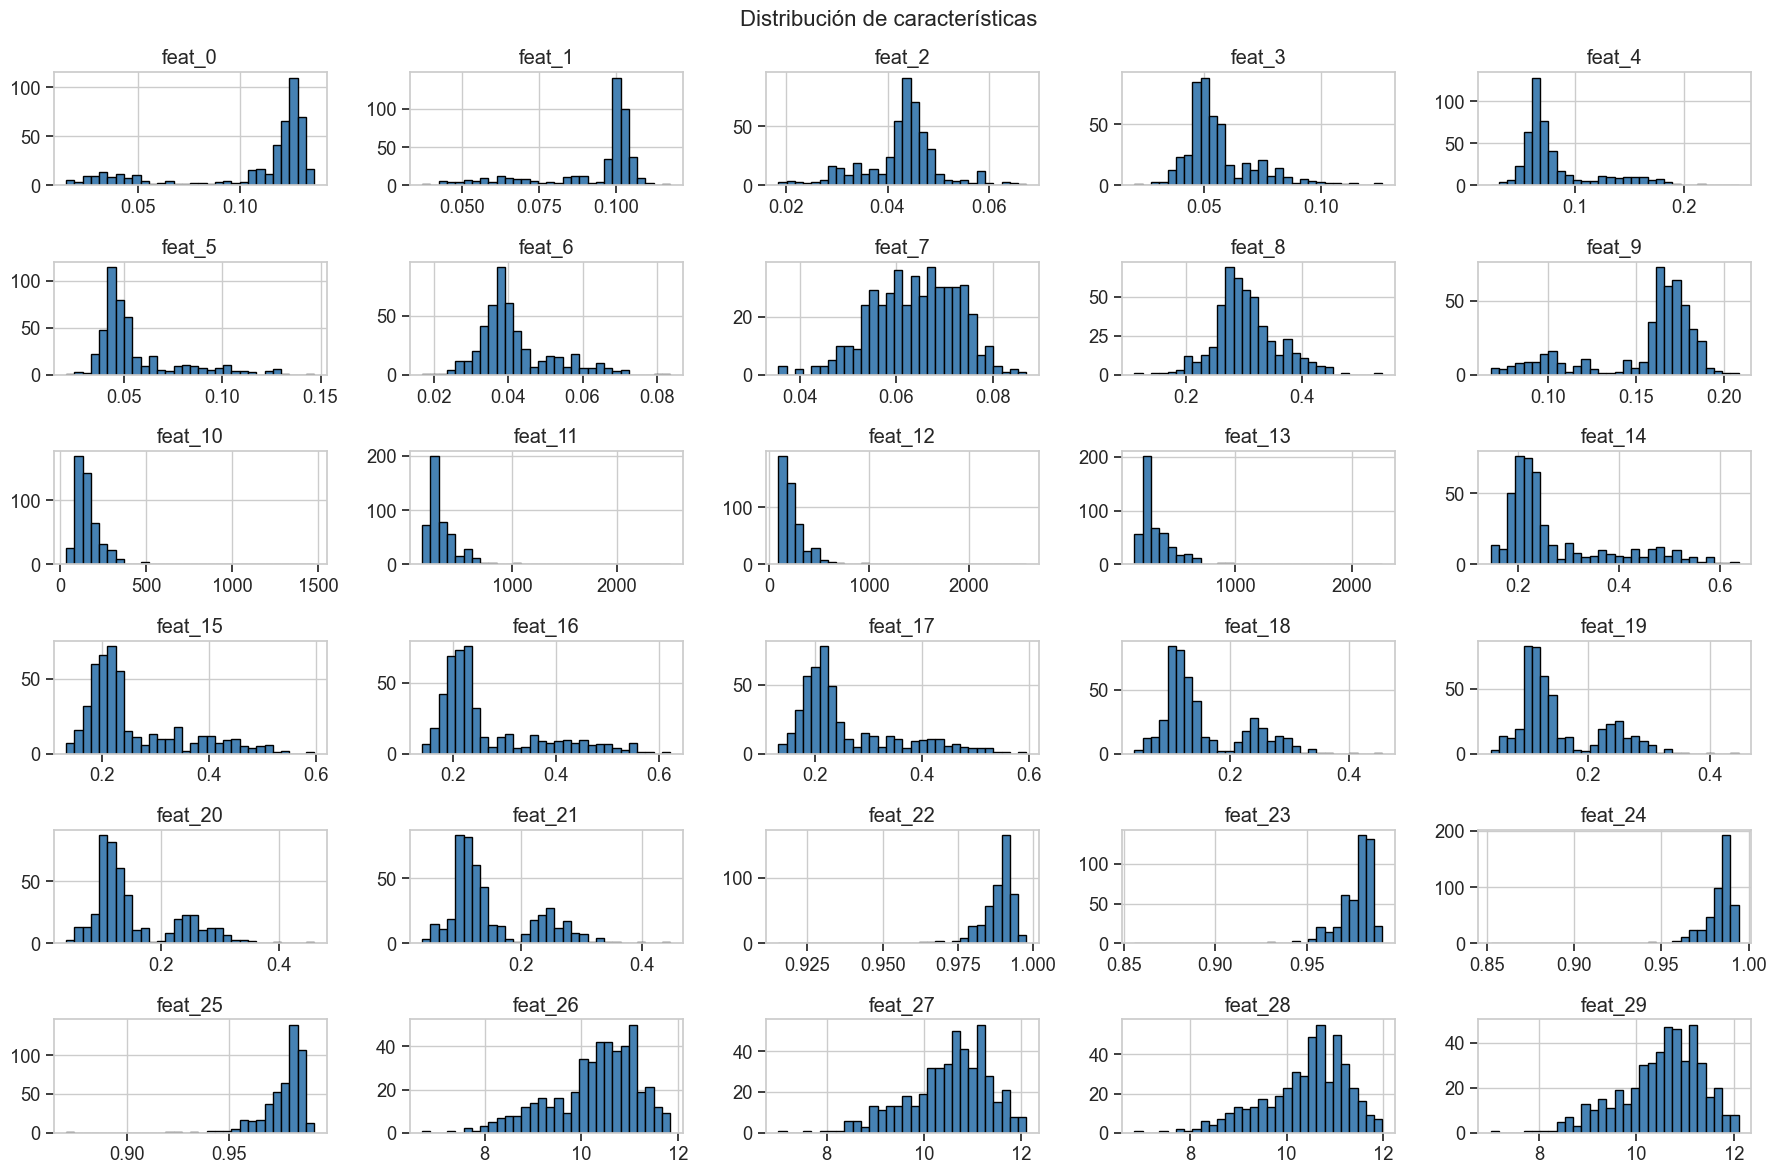

In [10]:
# Graficar histogramas para todas las características
df.hist(bins=30, figsize=(18, 12), color='steelblue', edgecolor='black')
plt.suptitle("Distribución de características", fontsize=16)
plt.tight_layout()
plt.show()
